In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('survey.csv')

Content
This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

Inspiration
Some questions worth exploring:

How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

In [3]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## You can see there are  1259 rows × 27 columns (1259 records and 27 features).
## I have got a quetion how well my data is distributed? meaning i have observed that males count is more than female count.
## United state count is more compared to other country.

    * I think this produces wrong results.
    

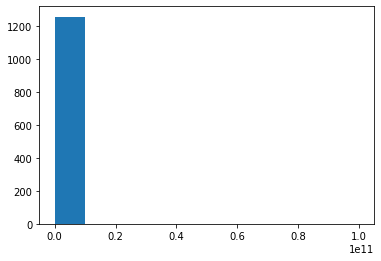

In [4]:
plt.hist(data['Age'])
plt.show()

In [5]:
from statsmodels.graphics.gofplots import qqplot

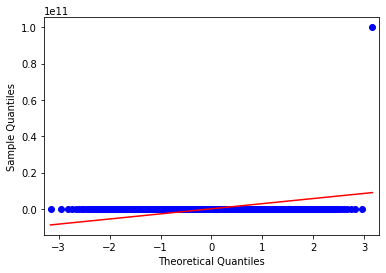

In [6]:
qqplot(data['Age'], line='s')
plt.show()

In [7]:
# As of now i am not deciding whether my data is normalised or not.

#Now i want to predict whether they are welling to take treatment for mental illness based on the age.
    * i am going with Yes or no caterogy which means i am using classification.(I have known the values of labels)

In [8]:
age = pd.DataFrame(data['Age'].describe())

In [9]:
age.reset_index()
age['Age'] = age['Age'].apply(lambda x: int(x))

In [10]:
age

,Age
count,1259
mean,79428148
std,2818299442
min,-1726
25%,27
50%,31
75%,36
max,99999999999


In [11]:
data['Age'].min()


-1726

In [12]:
data['Age'].max()

99999999999

In [13]:
## After looking at my age feature my ages ranges from -1726 to 999999 which is impossible.
## I have to find my outliners for the data column

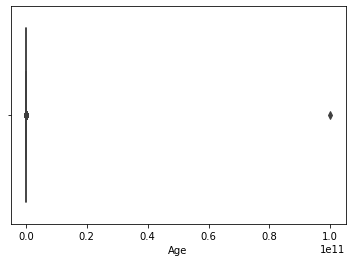

In [14]:
import seaborn as sns
sns.boxplot(x=data['Age'])

In [15]:
## NOt able to find anything from the above graph lets use sctter plot

In [16]:
datacopy = data.copy()
datacopy


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [18]:
data['Age'].min()

-1726

In [19]:
l = list(range(0,1259))

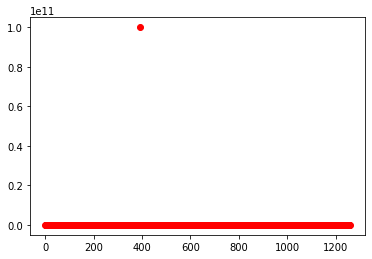

In [20]:
plt.scatter(l,data['Age'],color= 'Red')

In [21]:
def agelimit(x):
    if x < 0:
        return np.nan
    elif x > 100:
        return np.nan
    else:
        return x
    

In [22]:
data['Age'] = data['Age'].apply(agelimit)

In [23]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [24]:
data['Age'].describe()

count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [25]:
data.dropna(subset=['Age'],inplace = True)

In [26]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [27]:
data['Age'].describe()

count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

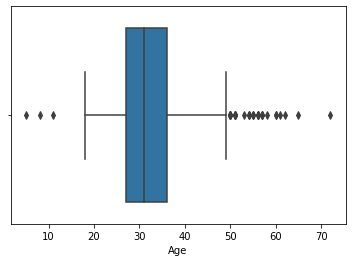

In [28]:
import seaborn as sns
sns.boxplot(x=data['Age'])

In [29]:
data['Age'].min()

5.0

In [30]:
data['Age'].max()

72.0

## After looking at the boxplot after removing the mising leading ages like -1415 and 99999999. Now i am able to see the outliners as you can see in the diagram.
## Now i have delete the outliners by removing the ages below 10 and after 50.

In [31]:
def agelimit2(x):
    if x < 24:
        return np.nan
    elif x > 48:
        return np.nan
    else:
        return x

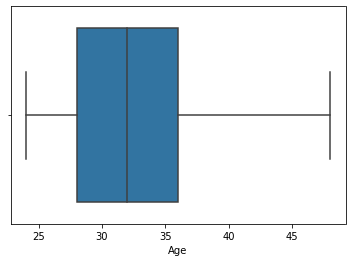

In [32]:
data['Age'] = data['Age'].apply(agelimit2)
data.dropna(subset=['Age'],inplace = True)
data['Age'].describe()
import seaborn as sns
sns.boxplot(x=data['Age'])

In [33]:
data['Age'].describe()

count    1105.000000
mean       32.376471
std         5.637557
min        24.000000
25%        28.000000
50%        32.000000
75%        36.000000
max        48.000000
Name: Age, dtype: float64

In [34]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [35]:
data['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
## treament feature has just 2 values either 'yes' or 'no' --> This means that i can modify the data into 0 and 1.

In [37]:
data['treatment'] = data['treatment'].apply(lambda x: 1 if x == "Yes" else 0)

In [38]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,1,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,No,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,0,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,male,United Kingdom,NaN,No,No,1,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,No,Yes,1,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,male,United States,CA,No,Yes,1,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,f,United States,NC,No,No,0,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## So I want to predict based on the above data ===> whether they are willing to take treatment based on the age.

In [39]:
X = data.iloc[:,1:2].values
X

array([[37.],
       [44.],
       [32.],
       ...,
       [34.],
       [46.],
       [25.]])

In [40]:
y = data.iloc[:,7].values

In [41]:
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 123)
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = Model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model.score(X_test,y_test)

[[ 23 132]
 [ 20 102]]
              precision    recall  f1-score   support

           0       0.53      0.15      0.23       155
           1       0.44      0.84      0.57       122

    accuracy                           0.45       277
   macro avg       0.49      0.49      0.40       277
weighted avg       0.49      0.45      0.38       277



0.45126353790613716

## As you can see there is just 45 % accurarcy in my predict. 
## Have to find why there is very less accurarcy ?? -- Let me show you visually.

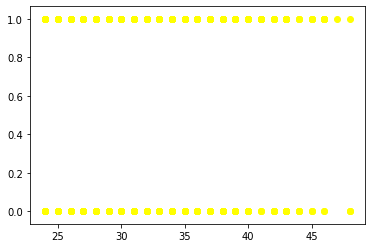

In [44]:
plt.scatter(X_train,y_train,color = 'yellow')


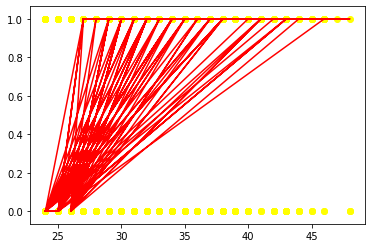

In [45]:
plt.scatter(X_train,y_train,color = 'yellow')
plt.plot(X_test,y_pred,color = 'Red')
plt.show()

## Whats wrong with my model is that i have used logistic regression which uses sigmoid funtion as a cost function.
        * This sigmoid funtion results only 2 outputs and assumes that till certain value of age it results in zero after that no matter is results one.
#### As per our data we cannot use this logistic regression.

In [46]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



parms = {'n_neighbors' : np.arange(1,50)}
knn_new = GridSearchCV(classifier,parms,cv = 5)
knn_new.fit(X_train,y_train)
knn_new.best_score_
knn_new.best_params_

{'n_neighbors': 1}

In [47]:
cm

array([[79, 76],
       [55, 67]], dtype=int64)

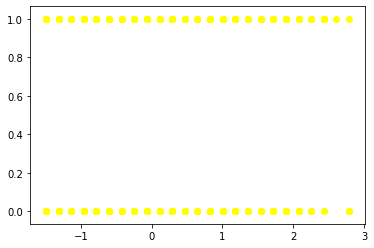

In [48]:
plt.scatter(X_train,y_train,color = 'yellow')


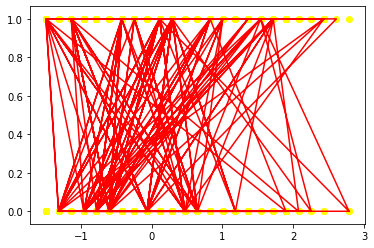

In [49]:
plt.scatter(X_train,y_train,color = 'yellow')
plt.plot(X_test,y_pred,color = 'Red')
plt.show()

In [50]:
data['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
data['family_history'] = data['family_history'].apply(lambda x: 1 if x == "Yes" else 0)

###### data

In [52]:
X = data.iloc[:,6:7].values
X

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [53]:
y = data.iloc[:,7].values
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 123)
from sklearn.linear_model import LogisticRegression
Model2 = LogisticRegression()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model2.score(X_test,y_test)

[[118  37]
 [ 48  74]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       155
           1       0.67      0.61      0.64       122

    accuracy                           0.69       277
   macro avg       0.69      0.68      0.69       277
weighted avg       0.69      0.69      0.69       277



0.6931407942238267

## There is 70 % chance of that if the parent has some mental illness then there child will be getting it.

In [55]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,0,1,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,0,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,0,0,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,1,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,0,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,male,United Kingdom,NaN,No,0,1,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,No,1,1,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,male,United States,CA,No,1,1,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,f,United States,NC,No,0,0,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [56]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Cis Female', 'F', 'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)',
       'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'msle', 'Neuter', 'Female (trans)', 'queer', 'Female (cis)',
       'Mail', 'cis male', 'Malr', 'Male ', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

## Now i am trying to convert the gender field into "female = 1" and 'male == 0'

In [57]:
def gender(x):
    if x in ['Female','female','Cis Female','F','Woman','f','queer/she/they','Femake' ,'woman','Female ','cis-female/femme','Female (trans)','queer', 'Female (cis)','femail']:
        return 0
    elif x in ['non-binary','Nah','Enby','fluid','Genderqueer','Neuter']:
        return 2
    else:
        return 1
             

In [58]:
data['Gender'] = data['Gender'].apply(gender)

In [59]:
data['Gender'].describe()

count    1105.000000
mean        0.803620
std         0.410886
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Gender, dtype: float64

In [60]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,0,United States,IL,NaN,0,1,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,1,United States,IN,NaN,0,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,1,Canada,NaN,NaN,0,0,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,1,United Kingdom,NaN,NaN,1,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,1,United States,TX,NaN,0,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,1,United Kingdom,NaN,No,0,1,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,1,United States,IL,No,1,1,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,1,United States,CA,No,1,1,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,0,United States,NC,No,0,0,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [61]:
data['Country'].value_counts()

United States             668
United Kingdom            161
Canada                     62
Germany                    42
Ireland                    25
Netherlands                23
Australia                  17
France                     12
Poland                      7
New Zealand                 7
Italy                       7
Belgium                     6
Switzerland                 6
Sweden                      5
Brazil                      5
South Africa                5
India                       4
Bulgaria                    4
Singapore                   3
Israel                      3
Mexico                      3
Croatia                     2
Russia                      2
Austria                     2
Finland                     2
Denmark                     2
Portugal                    2
Colombia                    2
Greece                      2
Norway                      1
Romania                     1
Costa Rica                  1
Czech Republic              1
Bosnia and

In [62]:
print(data['work_interfere'].value_counts())
print(data['work_interfere'].unique())

Sometimes    412
Never        183
Rarely       154
Often        123
Name: work_interfere, dtype: int64
['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [63]:
def workfun(x):
    if x == 'Often':
        return 3
    elif x == 'Sometimes':
        return 2
    elif x == 'Rarely':
        return 1
    else :
        return 0

## I just want to check all the 144 null values (Nan) >>>> i have check whether this these 144 values corresomfds to the treament no caterogy .

## How i may suppose to check whether these  null values 

In [64]:
data['work_interfere'] = data['work_interfere'].apply(workfun)

In [65]:
print(data['work_interfere'].value_counts())

0    416
2    412
1    154
3    123
Name: work_interfere, dtype: int64


In [66]:
print(data['tech_company'].value_counts())

Yes    907
No     198
Name: tech_company, dtype: int64


In [67]:
data['tech_company'] = data['tech_company'].apply(lambda x: 1 if x == "Yes" else 0)

In [68]:
print(data['tech_company'].value_counts())

1    907
0    198
Name: tech_company, dtype: int64


In [69]:
print(data['benefits'].value_counts())

Yes           428
Don't know    345
No            332
Name: benefits, dtype: int64


In [70]:
## I have to deccide what are the values that i have to put for these 3 values .>>>> Let me decide based on the go

## Now i want to apply all the features like age, family_history, gender and tech_company into our model and check whether my model works well or not.

In [71]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,0,United States,IL,NaN,0,1,3,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,1,United States,IN,NaN,0,0,1,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,1,Canada,NaN,NaN,0,0,1,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,1,United Kingdom,NaN,NaN,1,1,3,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,1,United States,TX,NaN,0,0,0,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,1,United Kingdom,NaN,No,0,1,0,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,1,United States,IL,No,1,1,3,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,1,United States,CA,No,1,1,2,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,0,United States,NC,No,0,0,0,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [75]:
ndata = data[['Age','Gender','family_history','work_interfere','treatment']]

In [77]:
ndata

,Age,Gender,family_history,work_interfere,treatment
0,37.0,0,0,3,1
1,44.0,1,0,1,0
2,32.0,1,0,1,0
3,31.0,1,1,3,1
4,31.0,1,0,0,0
...,...,...,...,...,...
1254,26.0,1,0,0,1
1255,32.0,1,1,3,1
1256,34.0,1,1,2,1
1257,46.0,0,0,0,0


In [78]:
X = ndata.iloc[:,0:4].values
X

array([[37.,  0.,  0.,  3.],
       [44.,  1.,  0.,  1.],
       [32.,  1.,  0.,  1.],
       ...,
       [34.,  1.,  1.,  2.],
       [46.,  0.,  0.,  0.],
       [25.,  1.,  1.,  2.]])

In [80]:
y = ndata.iloc[:,-1].values
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 123)


from sklearn.linear_model import LogisticRegression
Model3 = LogisticRegression()
Model3.fit(X_train,y_train)
y_pred3 = Model3.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
Model3.score(X_test,y_test)

[[117  38]
 [ 11 111]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.83       155
           1       0.74      0.91      0.82       122

    accuracy                           0.82       277
   macro avg       0.83      0.83      0.82       277
weighted avg       0.84      0.82      0.82       277



0.8231046931407943

### Hurray Hurray i got an accuracy of 82 % ............

## Actually i forgot to find the correlation of each and every features with corresponding independant feature treatment.m

In [85]:
print(len(X_train))
print(len(y_train))

828
828


In [87]:
%matplotlib inline

In [89]:
X_train.T.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

AxesSubplot(0.125,0.125;0.775x0.755)


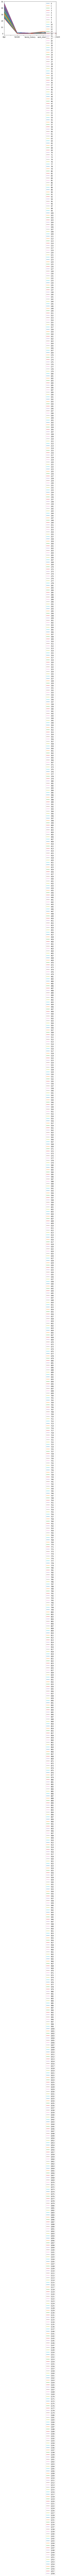

In [91]:
print(ndata.T.plot())

In [93]:
## I want to write a function which checks correlation of each feature.

In [94]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,0,United States,IL,NaN,0,1,3,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,1,United States,IN,NaN,0,0,1,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,1,Canada,NaN,NaN,0,0,1,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,1,United Kingdom,NaN,NaN,1,1,3,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,1,United States,TX,NaN,0,0,0,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,1,United Kingdom,NaN,No,0,1,0,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,1,United States,IL,No,1,1,3,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,1,United States,CA,No,1,1,2,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,0,United States,NC,No,0,0,0,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [106]:
data.corr()

,Age,Gender,family_history,treatment,work_interfere,tech_company
Age,1.000000,0.057754,0.011526,0.069561,0.047528,-0.101952
Gender,0.057754,1.000000,-0.121564,-0.181685,-0.112101,0.086855
family_history,0.011526,-0.121564,1.000000,0.382718,0.342235,-0.060383
treatment,0.069561,-0.181685,0.382718,1.000000,0.631495,-0.041701
work_interfere,0.047528,-0.112101,0.342235,0.631495,1.000000,-0.008015
tech_company,-0.101952,0.086855,-0.060383,-0.041701,-0.008015,1.000000
